In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import missingno as msno
%matplotlib inline
plt.style.use('ggplot')

In [3]:
!tree ..

..
├── LICENSE
├── README.md
├── cpu-nih.pem
├── data
│   ├── sample_submission.csv
│   ├── test.csv
│   └── train.csv
├── images
│   ├── ms_test.png
│   ├── ms_train.png
│   └── target_dist.png
├── nlp-getting-started.zip
└── notebooks
    └── sprint.ipynb

3 directories, 11 files


In [4]:
train, test = pd.read_csv('../data/train.csv'), pd.read_csv('../data/test.csv')

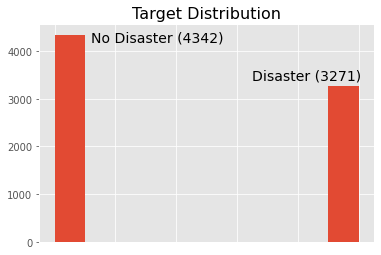

In [5]:
fig, ax = plt.subplots()
ax.hist(train['target'])
ax.set_title('Target Distribution', fontsize=16)
no_dis=train[train['target']==0].shape[0]
dis=train[train['target']==1].shape[0]
ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax.text(0.12,4200,f'No Disaster ({no_dis})', fontsize=14)
ax.text(0.65,3400,f'Disaster ({dis})', fontsize=14)
plt.savefig('../images/target_dist.png')

In [6]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
import itertools

In [19]:
[len(i) for i in train['text'] if train['target']==1]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [50]:
train_1 = train[(train['target']==1)]

In [51]:
train_0 = train[(train['target']==0)]

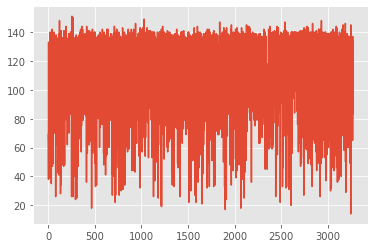

In [31]:
plt.plot([len(i) for i in train_1['text']])

In [47]:
dis_mean = np.mean([len(i) for i in train_1['text']])

In [48]:
no_dis_mean=np.mean([len(i) for i in train_0['text']])

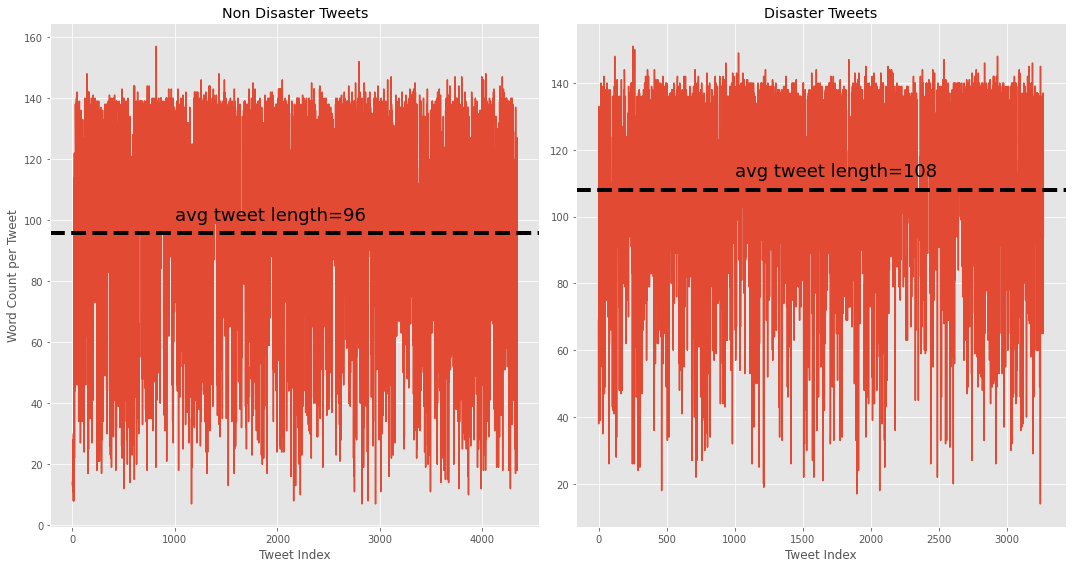

In [64]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))
#non disaster tweets
ax[0].plot([len(i) for i in train_0['text']])
ax[0].set_title('Non Disaster Tweets');
ax[0].axhline(no_dis_mean, 0,100, linewidth=4, color='k', ls='--')
ax[0].set_ylabel('Word Count per Tweet')
ax[0].set_xlabel('Tweet Index')
ax[0].text(1000,100,f'avg tweet length={int(round(no_dis_mean,0))}', fontsize=18)
#disaster tweets
ax[1].plot([len(i) for i in train_1['text']])
ax[1].set_title('Disaster Tweets')
ax[1].axhline(dis_mean, 0,100, linewidth=4, color='k', ls='--')
ax[1].text(1000,112,f'avg tweet length={int(round(dis_mean,0))}', fontsize=18)
ax[1].set_xlabel('Tweet Index')
plt.tight_layout()
plt.savefig('../images/avg_tweet_len.png')

In [81]:
import collections

In [84]:
collections.Counter(train[train["target"] == 1]["text"].values[1])

Counter({'F': 1,
         'o': 2,
         'r': 3,
         'e': 4,
         's': 2,
         't': 1,
         ' ': 6,
         'f': 1,
         'i': 1,
         'n': 3,
         'a': 6,
         'L': 1,
         'R': 1,
         'g': 1,
         'S': 1,
         'k': 1,
         '.': 1,
         'C': 1,
         'd': 1})

In [82]:
collections.Counter('abracadabra')

Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})